**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2025*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

pandas.set_option('display.float_format', lambda x: '%.3f' % x)

from sqlalchemy import create_engine, text

In [2]:
import plotly
plotly.__version__


'6.0.1'

In [3]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[567:1000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
567,Balwyn,275 Union Rd,5,h,2810000.000,PI,Jellis,25/02/2017,9.700,3103.000,...,3.000,4.000,1468.000,NaN,NaN,Boroondara,-37.813,145.100,Southern Metropolitan,5682.000
568,Balwyn,3/14 Weir St,3,t,1385000.000,S,Jellis,25/02/2017,9.700,3103.000,...,2.000,2.000,190.000,NaN,NaN,Boroondara,-37.816,145.085,Southern Metropolitan,5682.000
569,Balwyn,26 Wills St,4,h,2000000.000,PI,hockingstuart,27/06/2016,9.700,3103.000,...,1.000,2.000,739.000,291.000,1930.000,Boroondara,-37.804,145.063,Southern Metropolitan,5682.000
570,Balwyn,165 Balwyn Rd,4,h,1900000.000,S,Mandy,27/11/2016,9.700,3103.000,...,2.000,1.000,665.000,155.000,1940.000,Boroondara,-37.806,145.083,Southern Metropolitan,5682.000
571,Balwyn,17 Knutsford St,3,h,3401000.000,S,Jellis,27/11/2016,9.700,3103.000,...,2.000,1.000,706.000,166.000,1930.000,Boroondara,-37.816,145.075,Southern Metropolitan,5682.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Box Hill,6 Archibald St,3,h,4000000.000,VB,Lindellas,18/06/2016,13.100,3128.000,...,1.000,2.000,763.000,120.000,1945.000,Whitehorse,-37.817,145.121,Eastern Metropolitan,4605.000
996,Box Hill,19 Kent Rd,3,h,928000.000,S,Lindellas,18/06/2016,13.100,3128.000,...,1.000,1.000,307.000,106.000,1890.000,Whitehorse,-37.825,145.121,Eastern Metropolitan,4605.000
997,Box Hill,2/20 Simpsons Rd,2,u,761000.000,S,Marshall,18/06/2016,13.100,3128.000,...,2.000,1.000,176.000,NaN,2000.000,Whitehorse,-37.817,145.134,Eastern Metropolitan,4605.000
998,Box Hill,3/8 Ashted Rd,2,u,636000.000,S,Philip,19/11/2016,13.100,3128.000,...,1.000,1.000,151.000,82.000,1970.000,Whitehorse,-37.823,145.124,Eastern Metropolitan,4605.000


In [4]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Hay nulos en:
- Car (float)
- BuildingArea (float)
- YearBuilt (float)
- CouncilArea (object)

In [5]:
melb_df["Date"] = pandas.to_datetime(melb_df["Date"], format="%d/%m/%Y")
melb_df["Postcode"] = melb_df["Postcode"].astype(int)
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-12-03,2.500,3067,...,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,4019.000
1,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-02-04,2.500,3067,...,1.000,0.000,156.000,79.000,1900.000,Yarra,-37.808,144.993,Northern Metropolitan,4019.000
2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-03-04,2.500,3067,...,2.000,0.000,134.000,150.000,1900.000,Yarra,-37.809,144.994,Northern Metropolitan,4019.000
3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-03-04,2.500,3067,...,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,4019.000
4,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-06-04,2.500,3067,...,1.000,2.000,120.000,142.000,2014.000,Yarra,-37.807,144.994,Northern Metropolitan,4019.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.000,S,Barry,2017-08-26,16.700,3150,...,2.000,2.000,652.000,NaN,1981.000,NaN,-37.906,145.168,South-Eastern Metropolitan,7392.000
13576,Williamstown,77 Merrett Dr,3,h,1031000.000,SP,Williams,2017-08-26,6.800,3016,...,2.000,2.000,333.000,133.000,1995.000,NaN,-37.859,144.879,Western Metropolitan,6380.000
13577,Williamstown,83 Power St,3,h,1170000.000,S,Raine,2017-08-26,6.800,3016,...,2.000,4.000,436.000,NaN,1997.000,NaN,-37.853,144.887,Western Metropolitan,6380.000
13578,Williamstown,96 Verdon St,4,h,2500000.000,PI,Sweeney,2017-08-26,6.800,3016,...,1.000,5.000,866.000,157.000,1920.000,NaN,-37.859,144.893,Western Metropolitan,6380.000


## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Validar tipos de columnas antes de guardar: df.to_sql() infiere tipos automáticamente, pero a veces los nombres de columnas como Date, Price o ID dan problemas si vienen con strings o valores nulos.

4. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.
    - Consulta con filtro: ¿Cuántas propiedades hay por ciudad con más de 2 habitaciones?
    - Agregación condicional: ¿Cuál es el precio promedio de propiedades según tipo (Type) y ciudad?
    - Orden y límites: Mostrá el top 5 barrios con propiedades más caras en promedio.

5. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [6]:
# No tengo el dato de ciudad. Investigando, di con una libreria python que dado el Postcode, te devuelve la ciudad. 
import pgeocode

nomi = pgeocode.Nominatim("au")

def get_city(postcode):
    return nomi.query_postal_code(postcode)["county_name"]

In [7]:
# aplico la funcion a la columna Postcode
melb_df['City'] = melb_df['Postcode'].apply(get_city)

In [8]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///melb_df.db')

In [9]:
# ingest data from melb_df to table in the database
ddl = pandas.io.sql.get_schema(melb_df, 'melb', con=engine)
print(ddl)


CREATE TABLE melb (
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" DATETIME, 
	"Distance" FLOAT, 
	"Postcode" BIGINT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT, 
	"City" TEXT
)




In [10]:
# usando como base lo inferido, corrijo algunos campos (date y postcode)
tabla_def = """
CREATE TABLE melb (
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" DATE, 
	"Distance" FLOAT, 
	"Postcode" INT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT,
	"City" TEXT
)
"""
with engine.connect() as con:
    rs = con.execute(text(tabla_def))


In [11]:
melb_df.to_sql('melb', con=engine, if_exists="replace")

13580

In [12]:
# load dataset of airbnb prices
airbnb_df = pandas.read_csv('airbnb_price_by_zipcode.csv')
airbnb_df.head()

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.000,40.000,1,NaN,NaN
1,2134.000,50.000,1,NaN,NaN
2,2582.000,104.000,1,NaN,NaN
3,3000.000,150.504,3367,918.739,3407.205
4,3001.000,132.500,2,NaN,NaN


In [13]:
ddl = pandas.io.sql.get_schema(airbnb_df, 'airbnb_price_by_zipcode', con=engine)
print(ddl)


CREATE TABLE airbnb_price_by_zipcode (
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)




In [14]:
# como las tipos de columnas fueron bien inferidos, no es necesario hacer nada extra, solo importar los datos
airbnb_df.to_sql('airbnb_price_by_zipcode', con=engine, if_exists='replace')


247

In [15]:
# cantidad de registros totales por ciudad.
query_1 = "select City, count(*) from melb group by City;"
result_1 = pandas.read_sql(query_1, con=engine)
result_1

,City,count(*)
0,Banyule,591
1,Bayside (Vic.),442
2,Boroondara,990
3,Brimbank,1069
4,Cardinia,5
5,Casey,94
6,Darebin,1056
7,Frankston,84
8,Glen Eira,1109
9,Greater Dandenong,32


In [16]:
# cantidad de registros por barrio y ciudad
query_4 = "select Suburb, City, count(*) from melb group by Suburb, City"
result_4 = pandas.read_sql(query_4, con=engine)
result_4


,Suburb,City,count(*)
0,Abbotsford,Yarra,56
1,Aberfeldie,Moonee Valley,44
2,Airport West,Brimbank,67
3,Albanvale,Brimbank,6
4,Albert Park,Port Phillip,69
...,...,...,...
309,Wonga Park,Maroondah,1
310,Wyndham Vale,Melton,4
311,Yallambie,Darebin,24
312,Yarra Glen,Nillumbik,1


In [17]:
# Consulta con filtro: ¿Cuántas propiedades hay por ciudad con más de 2 habitaciones?
query_5 = "select City, count(*) from melb where Rooms > 2 group by City"
result_5 = pandas.read_sql(query_5, con=engine)
result_5


,City,count(*)
0,Banyule,440
1,Bayside (Vic.),334
2,Boroondara,635
3,Brimbank,898
4,Cardinia,5
5,Casey,86
6,Darebin,724
7,Frankston,79
8,Glen Eira,739
9,Greater Dandenong,29


In [18]:
# Agregación condicional: ¿Cuál es el precio promedio de propiedades según tipo (Type) y ciudad?
query_6 = "select City, Type, avg(Price) from melb group by City, Type"
result_6 = pandas.read_sql(query_6, con=engine)
result_6


,City,Type,avg(Price)
0,Banyule,h,1054022.813
1,Banyule,t,740238.889
2,Banyule,u,588576.471
3,Bayside (Vic.),h,1998787.326
4,Bayside (Vic.),t,1468508.772
...,...,...,...
83,Wyndham,u,379000.000
84,Yarra,h,1377681.146
85,Yarra,t,1033560.976
86,Yarra,u,621574.324


In [19]:
# Orden y límites: Mostrá el top 5 barrios con propiedades más caras en promedio.
query_7 = "select Suburb, avg(Price) from melb group by Suburb order by avg(Price) desc limit 5"
result_7 = pandas.read_sql(query_7, con=engine)
result_7


,Suburb,avg(Price)
0,Kooyong,2185000.000
1,Canterbury,2180240.741
2,Middle Park,2082529.412
3,Albert Park,1941355.072
4,Brighton,1930158.000


In [20]:
# Merge
query_8 = """
select * from melb
left join airbnb_price_by_zipcode apbz on melb.Postcode = cast(apbz.zipcode as int)
""" 
result_8 = pandas.read_sql(query_8, con=engine)
result_8.reset_index(drop=True, inplace=True)
result_8


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Longtitude,Regionname,Propertycount,City,index,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-12-03 00:00:00.000000,2.500,...,144.998,Northern Metropolitan,4019.000,Yarra,57.000,3067.000,130.624,258.000,605.152,2187.032
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-02-04 00:00:00.000000,2.500,...,144.993,Northern Metropolitan,4019.000,Yarra,57.000,3067.000,130.624,258.000,605.152,2187.032
2,2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-03-04 00:00:00.000000,2.500,...,144.994,Northern Metropolitan,4019.000,Yarra,57.000,3067.000,130.624,258.000,605.152,2187.032
3,3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-03-04 00:00:00.000000,2.500,...,144.997,Northern Metropolitan,4019.000,Yarra,57.000,3067.000,130.624,258.000,605.152,2187.032
4,4,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-06-04 00:00:00.000000,2.500,...,144.994,Northern Metropolitan,4019.000,Yarra,57.000,3067.000,130.624,258.000,605.152,2187.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.000,S,Barry,2017-08-26 00:00:00.000000,16.700,...,145.168,South-Eastern Metropolitan,7392.000,Monash,125.000,3150.000,124.026,189.000,526.350,1901.611
13576,13576,Williamstown,77 Merrett Dr,3,h,1031000.000,SP,Williams,2017-08-26 00:00:00.000000,6.800,...,144.879,Western Metropolitan,6380.000,Hobsons Bay,14.000,3016.000,191.095,74.000,612.250,2119.750
13577,13577,Williamstown,83 Power St,3,h,1170000.000,S,Raine,2017-08-26 00:00:00.000000,6.800,...,144.887,Western Metropolitan,6380.000,Hobsons Bay,14.000,3016.000,191.095,74.000,612.250,2119.750
13578,13578,Williamstown,96 Verdon St,4,h,2500000.000,PI,Sweeney,2017-08-26 00:00:00.000000,6.800,...,144.893,Western Metropolitan,6380.000,Hobsons Bay,14.000,3016.000,191.095,74.000,612.250,2119.750


In [21]:
melb_df.shape

(13580, 22)

## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar explicitamente las columnas seleccionadas y las que no lo fueron.
  1. Valores faltantes: ¿Qué porcentaje de filas tienen al menos un valor faltante?
  2.  Mostrar la dispersión o distribución de las columnas seleccionadas.
 3.  Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.
 4. Mostrar visualmente los valores extremos que eliminás



2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana (porque no la media?) o el mínimo.
  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  3. Mostrar un gráfico zipcode vs airbnb_price_median.
  4. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.
  5. Si las coordenadas geoespaciales estuvieran disponibles, como las usarian?

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

¿Qué cosas no están en los datos que te gustaría tener para predecir mejor el precio de una propiedad?

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar explicitamente las columnas seleccionadas y las que no lo fueron.

    1. Valores faltantes: ¿Qué porcentaje de filas tienen al menos un valor faltante?
    2.  Mostrar la dispersión o distribución de las columnas seleccionadas.

In [33]:
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-12-03,2.500,3067,...,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,4019.000
1,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-02-04,2.500,3067,...,1.000,0.000,156.000,79.000,1900.000,Yarra,-37.808,144.993,Northern Metropolitan,4019.000
2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-03-04,2.500,3067,...,2.000,0.000,134.000,150.000,1900.000,Yarra,-37.809,144.994,Northern Metropolitan,4019.000
3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-03-04,2.500,3067,...,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,4019.000
4,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-06-04,2.500,3067,...,1.000,2.000,120.000,142.000,2014.000,Yarra,-37.807,144.994,Northern Metropolitan,4019.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.000,S,Barry,2017-08-26,16.700,3150,...,2.000,2.000,652.000,NaN,1981.000,NaN,-37.906,145.168,South-Eastern Metropolitan,7392.000
13576,Williamstown,77 Merrett Dr,3,h,1031000.000,SP,Williams,2017-08-26,6.800,3016,...,2.000,2.000,333.000,133.000,1995.000,NaN,-37.859,144.879,Western Metropolitan,6380.000
13577,Williamstown,83 Power St,3,h,1170000.000,S,Raine,2017-08-26,6.800,3016,...,2.000,4.000,436.000,NaN,1997.000,NaN,-37.853,144.887,Western Metropolitan,6380.000
13578,Williamstown,96 Verdon St,4,h,2500000.000,PI,Sweeney,2017-08-26,6.800,3016,...,1.000,5.000,866.000,157.000,1920.000,NaN,-37.859,144.893,Western Metropolitan,6380.000


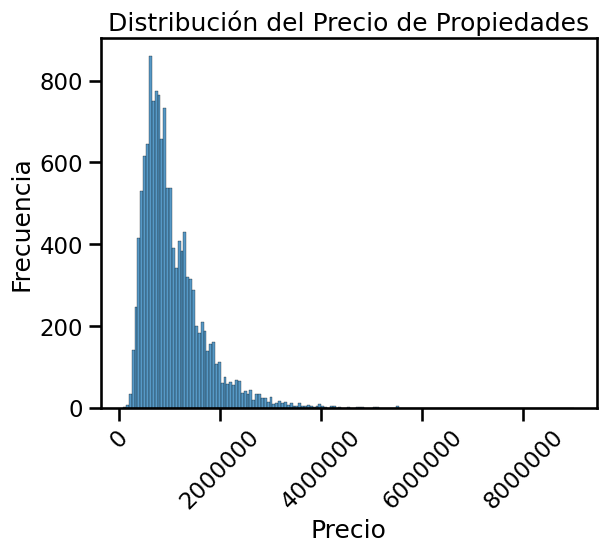

In [35]:
seaborn.histplot(melb_df.Price.dropna())
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución del Precio de Propiedades')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)